In [23]:
import numpy as np
import re
from csv import DictReader


fileLoc = "/home/vamsi/Downloads/fnc-1-baseline/fnc-1/"

text = []
with open(fileLoc+"words.txt") as f:
    text = f.read()
    text = re.sub('"','',text)
    text = re.sub(' ','',text)
    text = re.sub('\n','',text)
    text = text.split(',')
    
def readDict(fname):
        rows = []
        with open(fname, "r", encoding='utf-8') as table:
            r = DictReader(table)
            for line in r:
                rows.append(line)
        return rows
    


### Count Vectorization

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

numFeatures = 5000

countVectorizer = CountVectorizer(max_features=numFeatures, stop_words=text)

newsBody = readDict(fileLoc+"train_bodies.csv")

instances = readDict(fileLoc+"train_stances.csv")

headers = {}
newsBodies = {}

for instance in instances:
    if instance['Headline'] not in headers:
        head_id = len(headers)
        headers[instance['Headline']] = head_id
    instance['Body ID'] = int(instance['Body ID'])
#print(heads)

for body in newsBody:
    newsBodies[int(body['Body ID'])] = body['articleBody']


In [3]:
heads = []
heads_track = {}
bodies = []
bodies_track = {}
body_ids = []
id_ref = {}
train_set = []
train_stances = []
cos_track = {}
test_heads = []
test_heads_track = {}
test_bodies = []
test_bodies_track = {}
test_body_ids = []
head_tfidf_track = {}
body_tfidf_track = {}

# Identify unique heads and bodies
for instance in instances:
    head = instance['Headline']
    body_id = instance['Body ID']
    if head not in heads_track:
        heads.append(head)
        heads_track[head] = 1
    if body_id not in bodies_track:
        bodies.append(newsBodies[body_id])
        bodies_track[body_id] = 1
        body_ids.append(body_id)




In [4]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
bow = countVectorizer.fit_transform(heads + bodies) 

### tfreq

In [5]:
tfreq_vectorizer = TfidfTransformer(use_idf=False).fit(bow)
tfreq = tfreq_vectorizer.transform(bow).toarray() 

In [6]:
tfidf_vectorizer = TfidfVectorizer(max_features=numFeatures, stop_words=text).fit(heads + bodies + test_heads + test_bodies)  # Train and test sets

print(type(tfreq))

<class 'numpy.ndarray'>


In [7]:
        # Create reference dictionary
id_ref = {}
for i, elem in enumerate(heads + body_ids):
    id_ref[elem] = i
mapLabels = {'agree': 0, 'disagree': 1, 'discuss': 0, 'unrelated': 1}



In [8]:
print(len(bodies))
print(len(newsBodies))

1683
1683


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

for instance in instances:
    head = instance['Headline']
    body_id = instance['Body ID']
    head_tf = tfreq[id_ref[head]].reshape(1, -1)
    body_tf = tfreq[id_ref[body_id]].reshape(1, -1)
    if head not in head_tfidf_track:
        head_tfidf = tfidf_vectorizer.transform([head]).toarray()
        head_tfidf_track[head] = head_tfidf
    else:
        head_tfidf = head_tfidf_track[head]
    if body_id not in body_tfidf_track:
        print(body_id)
        body_tfidf = tfidf_vectorizer.transform([newsBodies[body_id]]).toarray()
        body_tfidf_track[body_id] = body_tfidf
    else:
        body_tfidf = body_tfidf_track[body_id]
    if (head, body_id) not in cos_track:
        tfidf_cos = cosine_similarity(head_tfidf, body_tfidf)[0].reshape(1, 1)
        cos_track[(head, body_id)] = tfidf_cos
    else:
        tfidf_cos = cos_track[(head, body_id)]
    feat_vec = np.squeeze(np.c_[head_tf, body_tf, tfidf_cos])
    train_set.append(feat_vec)
    train_stances.append(mapLabels[instance['Stance']])

712
158
137
1034
1923
154
962
2033
1739
882
2327
1468
1003
2132
47
615
2463
295
570
608
1500
1681
1545
1196
1014
633
56
1658
1157
132
1896
2344
625
2176
394
2161
1040
1251
1337
280
534
213
1299
1481
289
1592
2248
1255
1120
2045
2296
459
1905
2295
759
2406
181
2036
941
965
816
2106
367
373
1934
703
167
1175
724
2441
1338
527
32
26
487
1089
1898
205
1435
190
1808
2246
1315
1362
472
1125
1590
2240
702
1165
1720
1358
1832
346
1374
2404
1744
1406
1818
1958
775
2115
1849
1966
2174
992
2526
731
2097
1212
777
2084
922
1758
900
40
36
949
488
2495
821
1628
2237
1385
2448
345
2087
1661
1899
1048
35
573
618
321
887
2336
1509
119
2168
1547
176
855
689
2342
2477
2149
2064
1363
115
313
2046
139
986
1568
975
2210
2081
1438
2531
808
125
1401
687
1627
2290
2307
320
1948
271
1169
254
1574
2133
1242
2530
1982
1107
296
1786
1020
381
2047
2302
844
1471
1949
214
2061
1985
1476
1718
2293
1104
1987
1419
1603
2206
1301
467
2269
1058
1081
1355
678
971
639
1795
874
2492
2398
403
2130
720
1602
908
666
734
1093
154

In [10]:
max_id = 0
for i in instances:
    print(i['Body ID'])
    if max_id<i['Body ID']:
        max_id = i['Body ID']
        
print(max_id)
    

712
158
137
1034
1923
154
962
2033
1739
882
2327
1468
1003
2132
47
615
2463
295
570
608
1500
1681
1545
1196
1014
633
56
1658
2327
1157
132
1896
2344
625
2176
394
2161
1040
1251
1337
280
534
213
1299
1481
289
1592
2248
1255
1120
2045
2296
459
1905
2295
759
2406
181
2036
941
965
816
2106
367
373
1934
1500
703
167
1175
1034
724
2441
1338
2248
1040
527
32
26
487
1089
1898
205
1435
190
1808
2246
1315
1362
2033
472
1125
1590
2240
702
1165
1720
1358
1832
346
1374
2404
1744
1832
1406
1818
1958
775
2115
1849
1966
2174
992
2526
731
2097
2045
1212
777
2084
213
922
1758
2132
1681
900
40
36
949
488
2495
821
1628
2237
1385
1125
2448
345
2087
2463
2045
1661
1899
1048
35
573
618
321
887
2336
1818
1509
119
2045
2168
1547
176
855
689
2342
2132
2477
2149
2064
1363
115
313
472
2046
139
986
1568
975
2210
2081
1438
2531
808
125
1547
1401
687
1627
2290
2307
320
1948
1720
271
1169
254
1574
2133
1242
2530
1982
1107
775
1627
296
1786
1020
381
2047
2302
844
1471
1949
214
2061
1985
1476
1718
2293
1104
1987
1419
1

1012
568
1660
975
2490
203
2042
1832
1022
311
518
1689
2025
7
1185
993
1125
1948
2306
1661
720
2412
387
1807
2471
398
1239
1598
1166
1681
2413
205
513
1549
1708
1374
1829
1898
557
992
1299
1724
271
1439
1481
2520
2344
2096
1661
205
2295
1357
1943
2061
1251
1461
1756
1807
43
2415
2408
1880
2403
1982
2448
699
2523
1461
1857
1572
1564
1202
1393
1515
195
2404
689
1981
2391
1603
858
1034
1893
2404
2180
2242
2476
331
1826
205
190
1897
821
816
2181
499
1213
533
1580
244
1269
931
2261
1361
2261
1115
186
1638
26
1673
1137
1427
1028
214
1271
1433
2448
1921
534
260
760
205
1355
1301
1363
2188
1948
239
1572
1363
5
313
402
646
251
690
1252
1266
2016
1669
2520
504
2240
1875
1702
144
2188
267
630
2090
1916
776
137
2336
1217
757
616
2061
922
2175
2060
1419
34
2297
2251
2070
1889
1437
1630
800
1541
2042
959
1049
188
533
818
1461
677
691
132
2240
830
1681
1465
225
564
730
630
1679
119
446
1841
2149
825
533
235
1718
1331
1567
5
2287
320
1308
2483
185
2075
1808
1267
2116
1022
1832
2272
1313
737
1791
2037


1982
2330
1319
672
104
1291
2520
2034
1416
816
2354
2134
887
220
1406
2302
2388
2526
2521
879
1693
511
1549
2152
1702
2374
1500
527
251
663
1019
267
2443
1014
23
676
968
1637
1778
286
2508
693
2192
1786
2147
958
1069
87
1034
1500
817
1368
2314
2142
1857
1549
1877
737
324
872
1442
1642
1955
2375
670
244
1457
2003
1107
2445
726
2252
755
2421
2010
428
1795
1790
1839
941
2033
2188
1119
1795
1120
26
2187
704
1374
2132
1921
1697
1338
1251
1107
2329
2042
2364
696
2344
137
171
1549
2155
1481
1806
2175
234
2296
1340
447
1498
2472
694
1692
2404
706
2463
1213
0
2407
1778
505
2528
803
1790
239
533
2404
2344
2302
1883
752
2388
1789
1351
1293
1239
1888
1104
26
1651
2060
2524
1648
1120
2147
1921
1040
879
359
34
1921
1365
40
2106
1885
405
1899
190
534
1790
572
1478
754
1769
693
2408
171
2055
511
1467
1697
1787
703
2125
1406
2389
269
1506
2061
2338
1817
2419
908
2230
1807
2431
1678
1478
263
1549
115
2033
1742
7
1271
1574
1921
2124
1940
570
1338
2191
2354
1296
2478
7
1889
687
2327
386
1966
830
225
472
1

1502
2327
1686
1042
1832
2370
171
551
660
1438
1347
670
472
2010
269
2403
2371
1347
2434
26
13
1969
1598
2287
1226
1956
1900
2220
2096
511
826
2197
93
2208
2261
2317
1438
2354
2338
1323
2410
932
1458
2410
1405
2348
1385
1104
1240
625
1648
2118
1549
1252
7
2463
837
1871
2185
1009
2337
465
36
1569
1164
2267
2020
761
1351
1720
1869
1893
304
1644
1627
1938
568
2345
81
15
1294
2411
2016
1896
5
1744
263
1498
1913
687
304
2313
1020
1769
1122
1853
1269
971
132
2130
2017
2118
1843
2172
2002
1891
1315
1789
2272
2163
2264
2056
1093
1169
1347
1785
2415
1740
847
342
524
1803
1950
1645
776
2307
2045
1549
2354
520
1681
1832
2470
1231
860
1459
339
545
170
1083
269
1817
2386
2154
698
2175
155
176
2371
168
381
2360
936
1374
938
208
2408
1036
1899
1323
2354
2343
89
1574
269
1637
1481
2303
859
557
1948
1901
43
1726
727
2062
682
2287
2187
682
2302
235
2303
1926
1678
1384
1661
1813
1574
377
1885
1686
616
964
1896
1164
2002
1004
1175
1317
513
304
702
662
1544
873
2044
1991
1227
1439
676
1826
1143
712
158
207

1589
1921
1068
616
35
1024
2504
2152
2404
844
1019
2386
1594
2115
1681
1707
2520
2096
227
1996
2434
1916
2042
646
1215
524
2399
1807
1103
2463
630
1291
2388
1022
609
1437
1948
186
830
1821
1832
1426
609
524
796
2314
958
2459
2475
1397
446
2097
846
2124
35
1829
347
2328
2115
220
1106
1883
754
478
1569
2463
1996
1137
2010
2463
2237
2463
2498
2109
1481
2078
1403
534
321
2248
2124
961
1358
171
2404
2521
2261
1530
167
2009
1376
1789
1580
950
633
2448
961
2078
1854
1731
2176
1368
186
387
2523
54
2506
205
2067
1858
1982
583
214
1020
693
2434
1898
322
1549
1016
220
23
831
2103
2266
1888
968
1301
542
2345
1457
730
821
941
741
1094
304
614
2053
2176
2286
1921
497
2340
1406
1900
539
1289
518
1374
2044
170
822
1905
1183
2286
2130
1095
1301
2042
1242
527
13
818
1933
1543
945
2307
1009
527
320
1422
2349
2249
2307
993
2127
1179
2039
1293
1429
887
2483
2156
1939
2318
1325
1338
366
331
2088
1435
1549
2476
2033
1891
1789
1869
1885
2264
2328
1805
1400
723
1004
2386
60
1905
1871
694
2176
2097
1234
1707
16

450
1036
886
168
726
1544
1873
1162
565
942
1740
2092
2078
2200
1131
859
955
724
2317
511
773
2371
2088
958
258
666
2349
944
40
1296
1175
950
885
1253
2213
1686
616
2520
1844
859
2096
1939
607
2115
1873
2526
2237
1311
1549
1400
2175
1406
444
1311
2276
1143
324
1888
1634
571
991
1458
2070
1949
1029
195
2176
2343
1423
2046
1637
505
1024
1622
431
511
1689
957
29
2155
2184
640
950
1933
1212
1081
2385
2044
1538
34
1398
662
2288
1934
2421
35
1438
2352
1090
844
1125
1844
1795
1197
1939
2352
1580
1708
920
645
2256
646
242
2132
1808
1647
1155
2360
303
1481
1170
2313
2223
961
626
1549
1026
1627
2531
1950
723
1192
621
1877
2307
1201
2431
1480
1569
1226
545
1916
2297
1948
830
724
2520
2237
634
1251
1372
1242
1213
2420
2045
1832
1819
698
2002
105
981
173
529
859
992
826
1268
2525
269
1615
17
1374
1900
1385
2081
2515
2367
1540
1361
521
1758
666
1831
572
639
1982
1019
1120
571
2379
859
1708
2483
269
1251
1435
2290
808
1644
1678
381
1530
1295
505
1661
2176
1885
1744
1365
2447
688
2070
373
621
557
2404

488
1003
1477
34
2389
2162
1588
1494
1480
1634
829
2520
397
1423
2281
1950
1438
1019
737
1970
1680
1588
2415
2307
748
1549
968
2415
822
500
1776
2162
1157
2127
11
2114
1948
2256
2141
388
2523
979
1027
720
1682
244
244
1400
709
1180
405
968
2125
7
2115
2356
626
530
2415
1786
2068
1273
1940
2356
235
2372
917
2469
2165
1489
483
2200
633
1143
1764
126
830
609
1843
167
2009
550
1572
1045
2042
1481
1836
1046
1338
487
1969
2341
244
1795
1744
724
1844
190
2526
1383
209
8
413
1829
1408
892
126
805
132
1385
359
1169
2252
1295
2519
1535
1921
1288
2299
2360
450
859
1971
214
648
431
1923
1974
2495
1781
2404
2306
385
1891
859
1351
1019
730
258
467
1731
88
1239
1813
1385
1797
867
2175
1019
1197
2097
2385
1385
1758
1808
859
1539
2118
2078
855
591
2132
846
1437
1478
687
1024
2431
40
2009
186
1686
2459
1349
2287
513
1569
848
93
1891
917
1747
825
1213
1734
650
630
1883
703
1849
1459
730
2103
2304
1313
608
1125
1787
2410
1251
404
1267
1974
5
1176
2234
254
130
1950
225
1939
2328
2272
1966
1016
1642
235
163

2141
1852
126
1570
2096
2206
1442
2109
777
388
1611
1339
1333
1839
626
2044
1289
419
1253
1863
880
1176
214
1940
36
1494
1627
1187
2304
1340
1565
1800
694
2177
1094
2042
2432
1598
1565
1311
381
527
1735
1299
2218
1274
1179
2230
706
1931
1815
40
413
1575
1273
1825
2197
346
1048
686
1982
1853
2508
1680
2161
2313
1293
1854
1760
1837
618
7
1358
2022
2220
1361
1408
2302
2161
144
720
689
2075
2471
2287
403
1644
1787
2338
32
2458
2220
295
304
2410
1419
1880
2434
1178
35
2048
1670
1854
2088
616
1458
1786
2129
1143
2526
964
822
743
2192
2386
595
950
1806
125
706
1269
244
1642
225
1024
1351
932
2154
2260
595
2002
346
815
1271
1223
221
10
2240
592
2520
1547
1778
2349
1012
2304
777
1267
1946
1521
1906
1974
2454
2314
322
1574
1303
794
2252
2398
1256
1195
344
1917
513
2528
913
1702
2318
2240
1198
1406
1104
1029
698
2463
2202
2061
539
2504
1293
258
1419
344
1541
242
40
1095
234
651
1429
1222
2501
1866
1660
1923
2272
559
1988
2306
694
1446
516
1530
1502
741
1384
1004
2509
2413
2002
2455
2022
1184
1974

2072
1190
851
1921
1125
817
1787
1040
1789
2132
1808
1731
2453
2367
2404
984
1034
993
1873
1547
2526
2431
1024
1483
40
2338
130
1277
2234
1857
346
803
2115
1619
54
1913
2483
1122
1393
727
1385
1692
1839
205
227
2078
2408
1040
740
1569
1661
1004
221
1288
2448
1317
1900
2240
239
2261
168
2257
1772
1120
1521
666
942
1543
425
505
391
2208
1408
1841
1473
2313
1978
169
1854
1137
2167
936
399
511
572
2404
1854
2360
1195
1339
1252
1950
1702
1541
1800
402
1699
498
2370
819
1040
614
1371
1535
2266
1256
844
986
1786
845
125
524
1097
1291
1697
2328
2268
1844
1697
2102
2329
2154
1597
2417
1857
2524
1680
1148
1840
2115
687
344
1183
534
35
754
2297
1966
324
2525
1718
2187
34
1240
2261
1377
1040
789
205
1226
2530
1905
2235
539
2196
808
2520
1862
1649
254
1237
961
286
1006
2281
539
1751
1437
2523
396
524
1795
1277
214
2249
385
1467
2130
2174
280
1588
1580
1549
1574
385
1863
1541
1839
2133
1338
846
882
550
2469
2385
1439
1481
1178
1359
1670
1790
1289
1116
808
2495
2477
1702
1006
533
1289
2092
2481
2495


1772
1234
593
2010
76
612
345
1478
1698
1597
307
634
2127
1873
443
568
2142
651
367
1413
1950
532
1040
1697
186
2070
2044
269
280
1954
236
662
2044
480
1299
1660
2283
919
1659
903
818
1344
1071
1307
2016
258
867
1900
2180
626
1724
1806
2330
2404
2502
1588
2304
1948
220
320
1048
1747
1385
2266
1408
115
1916
1936
2109
1905
1155
1385
834
1949
719
2039
1294
2409
539
2144
1913
1339
2177
693
1338
498
1372
251
104
1506
760
425
2347
2403
730
1883
2240
2360
2132
955
365
2404
755
267
812
1715
2328
1385
2450
1588
2367
247
2475
964
855
748
573
244
1660
2132
1289
719
139
1819
1461
2404
1226
2452
1751
1720
40
320
2256
1817
40
529
568
2338
218
2336
1686
837
979
882
789
1589
459
1074
650
1071
2345
1739
220
1642
2152
1906
1000
1731
2526
1170
1787
2453
206
1981
1821
800
505
1361
513
1383
1234
1673
859
2208
1137
1406
646
2184
2009
1465
2354
2127
1014
235
703
2317
2504
144
592
2404
1442
1852
1987
1917
586
955
2446
1260
1699
1791
684
2016
1336
2227
1690
2478
775
2408
1109
704
1804
1586
1547
1732
40
1859
14

721
40
472
938
2106
1471
1459
1435
2252
1567
2192
387
2141
391
1217
2197
571
2338
1281
1212
1948
2034
1374
2523
1921
2061
1747
757
2313
1261
195
837
305
1338
1693
91
1295
1905
754
388
1679
1540
1042
2175
2525
1913
524
2175
1295
1646
932
2448
1681
2336
608
77
2345
1461
320
504
955
221
648
1875
607
2459
1477
1006
1500
2447
730
1917
1006
1256
855
1603
2042
1761
2418
1336
900
280
2064
1226
1843
2034
691
1406
1125
2022
551
199
424
721
2248
1014
709
511
511
704
1808
93
1471
2123
1336
2200
2002
2127
2147
1171
1603
2421
2265
1401
1549
313
346
1034
7
1347
640
1538
1120
1385
2327
2453
403
757
932
304
1808
505
26
526
1804
1498
1645
1331
882
1744
286
1213
298
2072
959
2443
1077
2283
1832
1166
1535
1461
1893
1917
2481
1355
1589
2113
1689
2483
2479
2367
1465
320
456
2015
1669
1948
1931
22
2431
1295
1385
2087
1950
1661
391
195
2070
321
643
367
1299
1747
1011
2056
2524
1817
1837
1627
1020
1829
2067
1637
855
1681
1120
1693
564
2410
1631
997
1403
1013
2314
529
1506
2261
1853
545
2141
26
1406
887
781
117

1083
658
1791
382
2234
2404
1751
1917
2141
2132
1374
1744
2473
527
1040
1192
2443
2058
2144
2295
1022
948
1690
281
320
1628
2016
1489
734
844
1438
244
40
2042
2034
1429
1251
1277
130
1342
1223
2524
1234
723
504
1822
1184
1480
847
1361
1547
2130
1347
137
621
1509
2296
2307
1547
1572
599
1905
2445
971
1785
2137
1893
539
1933
1120
2051
2156
509
959
2354
1374
1107
1931
1242
1212
367
1461
793
82
1966
1295
225
2137
992
1197
409
225
1996
511
1473
586
1368
2192
2434
2192
2017
305
1294
570
1718
1239
832
1573
962
1256
1258
1372
1680
2473
1296
1699
1737
1010
2123
648
2470
1251
2197
702
964
1818
61
1048
2498
2124
887
776
1299
2343
2267
1912
320
1416
1721
1658
1686
1090
1395
2266
2141
104
887
1853
670
1689
827
690
298
1841
2524
1351
2250
139
1744
2515
2072
298
687
2367
1077
1573
2470
1263
2523
1869
2302
1073
1507
304
592
427
1871
1804
1572
220
609
626
968
956
662
1355
1283
664
1679
2240
634
1120
731
483
1157
2068
1817
891
1897
979
1251
2153
695
2274
503
2431
1202
1747
2256
1210
2070
1648
1034
2152


1897
1821
2314
1950
2354
320
225
1283
144
2304
2240
1978
2477
1529
1580
1125
456
2412
244
472
1708
2096
1384
1361
1731
2152
816
568
171
2185
2047
1234
1095
984
773
2090
2434
1658
1939
2492
1034
2317
653
2138
599
1803
1427
104
1040
505
2327
137
891
2123
754
139
2334
1966
1249
1137
1549
1400
321
1034
1016
1476
1854
1549
1291
2463
761
2096
1588
1403
1129
1582
2302
1883
2016
1258
40
81
2370
1681
2034
1820
478
1361
1347
522
2015
1543
45
874
1419
305
539
1423
1905
1439
903
662
72
2309
236
2528
1637
1543
1866
2498
1721
2149
499
761
1627
1678
1413
1269
913
1477
269
125
1152
345
56
737
171
1358
125
511
1439
2403
61
2192
2211
1455
1042
1939
1828
2403
964
1212
2247
550
1854
2141
1351
1544
618
1040
917
1095
2106
692
1933
62
1176
1934
2345
1627
1905
2016
545
1939
1817
2175
844
704
1806
1015
1213
1323
1893
2374
1883
1808
125
1066
1372
2433
1968
2039
1939
1131
2385
1103
1559
1068
2508
962
686
1083
1237
1087
2237
972
1939
235
366
195
169
1771
171
2096
467
1933
1071
54
2431
972
308
2531
568
1423
1377
7

In [12]:
import tensorflow as tf

hidden_size = 100
target_size = 4
l2_alpha = 0.00001

feature_size = len(train_set[0])
features_pl = tf.placeholder(tf.float32, [None, feature_size], 'features')
stances_pl = tf.placeholder(tf.int64, [None], 'stances')
keep_prob_pl = tf.placeholder(tf.float32)

# Infer batch size
batch_size = tf.shape(features_pl)[0]

# Define multi-layer perceptron
hidden_layer = tf.nn.dropout(tf.nn.relu(tf.contrib.layers.linear(features_pl, hidden_size)), keep_prob=keep_prob_pl)
logits_flat = tf.nn.dropout(tf.contrib.layers.linear(hidden_layer, target_size), keep_prob=keep_prob_pl)
logits = tf.reshape(logits_flat, [batch_size, target_size])

# Define L2 loss
tf_vars = tf.trainable_variables()
l2_loss = tf.add_n([tf.nn.l2_loss(v) for v in tf_vars if 'bias' not in v.name]) * l2_alpha

# Define overall loss
loss = tf.reduce_sum(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=stances_pl) + l2_loss)
#print loss

# Define prediction
softmaxed_logits = tf.nn.softmax(logits)
predict = tf.arg_max(softmaxed_logits, 1)


/home/vamsi/miniconda2/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Instructions for updating:
Use `argmax` instead


In [13]:
# Initialise

newsBody = readDict(fileLoc+"competition_test_bodies.csv")

test_instances = readDict(fileLoc+"competition_test_stances_unlabeled.csv")

headers = {}
bodies = {}

for instance in test_instances:
    if instance['Headline'] not in headers:
        head_id = len(headers)
        headers[instance['Headline']] = head_id
    instance['Body ID'] = int(instance['Body ID'])
#print(heads)

for body in newsBody:
    bodies[int(body['Body ID'])] = body['articleBody']



for instance in test_instances:
    head = instance['Headline']
    body_id = instance['Body ID']
    if head not in test_heads_track:
        test_heads.append(head)
        test_heads_track[head] = 1
    if body_id not in test_bodies_track:
        test_bodies.append(bodies[body_id])
        test_bodies_track[body_id] = 1
        test_body_ids.append(body_id)

test_set = []
heads_track = {}
bodies_track = {}
cos_track = {}

# Process test set
for instance in test_instances:
    head = instance['Headline']
    body_id = instance['Body ID']
    if head not in heads_track:
        head_bow = countVectorizer.transform([head]).toarray()
        head_tf = tfreq_vectorizer.transform(head_bow).toarray()[0].reshape(1, -1)
        head_tfidf = tfidf_vectorizer.transform([head]).toarray().reshape(1, -1)
        heads_track[head] = (head_tf, head_tfidf)
    else:
        head_tf = heads_track[head][0]
        head_tfidf = heads_track[head][1]
    if body_id not in bodies_track:
        body_bow = countVectorizer.transform([bodies[body_id]]).toarray()
        body_tf = tfreq_vectorizer.transform(body_bow).toarray()[0].reshape(1, -1)
        body_tfidf = tfidf_vectorizer.transform([bodies[body_id]]).toarray().reshape(1, -1)
        bodies_track[body_id] = (body_tf, body_tfidf)
    else:
        body_tf = bodies_track[body_id][0]
        body_tfidf = bodies_track[body_id][1]
    if (head, body_id) not in cos_track:
        tfidf_cos = cosine_similarity(head_tfidf, body_tfidf)[0].reshape(1, 1)
        cos_track[(head, body_id)] = tfidf_cos
    else:
        tfidf_cos = cos_track[(head, body_id)]
    feat_vec = np.squeeze(np.c_[head_tf, body_tf, tfidf_cos])
    test_set.append(feat_vec)



In [33]:
import random
learn_rate = 0.01
clip_ratio = 5
batch_size_train = 500
epochs = 90
train_keep_prob = 0.6
n_train = len(instances)
opt_func = tf.train.AdamOptimizer(learn_rate)
grads, _ = tf.clip_by_global_norm(tf.gradients(loss, tf_vars), clip_ratio)
opt_op = opt_func.apply_gradients(zip(grads, tf_vars))
r = random.Random()
step = []
loss_minibatch = []
new_loss_minibatch = []
# Perform training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(epochs):
        total_loss = 0
        indices = list(range(n_train))
        r.shuffle(indices)

        for i in range(n_train // batch_size_train):
            batch_indices = indices[i * batch_size_train: (i + 1) * batch_size_train]
            batch_features = [train_set[i] for i in batch_indices]
            batch_stances = [train_stances[i] for i in batch_indices]

            batch_feed_dict = {features_pl: batch_features, stances_pl: batch_stances, keep_prob_pl: train_keep_prob}
            _, current_loss = sess.run([opt_op, loss], feed_dict=batch_feed_dict)
            total_loss += current_loss
            #if (i == 0): ## info will be printed every 1000th time
        print(epoch)
        step.append(epoch)
        print("Minibatch loss at step %d: %f" % (epoch, total_loss))
        new_loss_minibatch.append(total_loss)
                #print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
                #accuracy_minibatch.append(accuracy(predictions, batch_labels))
                #print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), valid_labels))    
                #accuracy_valid.append(accuracy(valid_prediction.eval(), valid_labels))
        test_feed_dict = {features_pl: test_set, keep_prob_pl: 1.0}
    test_pred = sess.run(predict, feed_dict=test_feed_dict)


0
Minibatch loss at step 0: 28592.050797
1
Minibatch loss at step 1: 19665.807693
2
Minibatch loss at step 2: 18241.773804
3
Minibatch loss at step 3: 18162.739151
4
Minibatch loss at step 4: 17583.803131
5
Minibatch loss at step 5: 17519.209290
6
Minibatch loss at step 6: 17280.554565
7
Minibatch loss at step 7: 17433.056839
8
Minibatch loss at step 8: 17145.055649
9
Minibatch loss at step 9: 17057.167542
10
Minibatch loss at step 10: 16939.325546
11
Minibatch loss at step 11: 17055.983521
12
Minibatch loss at step 12: 17136.113556
13
Minibatch loss at step 13: 17258.212128
14
Minibatch loss at step 14: 17002.203018
15
Minibatch loss at step 15: 17012.628387
16
Minibatch loss at step 16: 17285.815308
17
Minibatch loss at step 17: 16980.729691
18
Minibatch loss at step 18: 16844.980072
19
Minibatch loss at step 19: 16725.020966
20
Minibatch loss at step 20: 16859.015015
21
Minibatch loss at step 21: 16893.111359
22
Minibatch loss at step 22: 17204.124893
23
Minibatch loss at step 23: 1

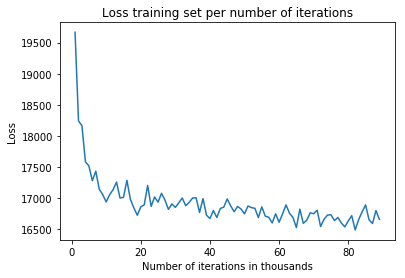

In [43]:

import matplotlib.pyplot as plt
#import seaborn as sns

#plt.figure(figsize=(20, 4))

#plt.subplot(1, 2, 1)
plt.plot(step[1:len(step)],new_loss_minibatch[1:len(step)])
plt.xlabel('Number of iterations in thousands')
plt.ylabel('Loss')
plt.title('Loss training set per number of iterations')
plt.show()

### Testing

In [44]:
actualLabels = readDict(fileLoc+"competition_test_stances.csv")

actualStances = []

for r in actualLabels:
   # print(r['Stance'])
    #print(label_ref[r])
    actualStances.append(mapLabels[r['Stance']])
    
count =0

for i in range(len(actualStances)):
    if actualStances[i] == test_pred[i]:
        count += 1
        
print(count/len(actualStances))

0.925943414787707


In [30]:
0.9294062094203754 - 8000
0.9283437610671703 - 5000


0.9294062094203754

TfidfVect = TfidfVectorizer()

TfidfTrans = TfidfVect.fit_transform(trainPosts)

TfidfClassifier = SVM().fit(TfidfTrans, labels)

TfidfTest = TfidfVect.transform(testPosts)

predicted = TfidfClassifier.predict(TfidfTest)



### SVM